<a href="https://colab.research.google.com/github/isaacyeSN/SS2021/blob/main/Day1AM/Copy_of_SS21_assgn1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Assignment #1: Single variable linear regresion**

Write a single-variable linear regression code using the given code with following features.	

1) model: linear

2) cost function: MSE

3) optimizer: SGD

## 0. Import necessary modules


In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from sklearn.metrics import mean_absolute_error
import argparse
import time

## 1. Data preparation

Preparing data for linear regression. Data made of combining $sin(x)$ and $cos(x)$ with some random error. The dataset has one input feature for one $y$ value which requires **single variable linear regression**.

---
The function generates total 2400 data and it is split into three parts; training, validation and testing. Each dataset has 1600, 400 and 400 respectively.

**Data Set**  
$$X_{train} \in \mathcal{R}^{360 \times 1}, Y_{train} \in \mathcal{R}^{360}$$  
$$X_{test} \in \mathcal{R}^{40 \times 1}, Y_{test} \in \mathcal{R}^{40}$$

### Inspecting dataset

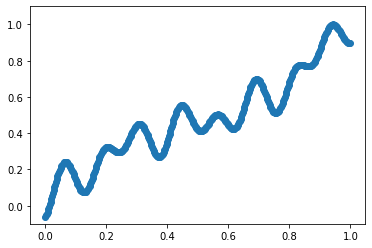

In [2]:
# ====== Data generation using Numpy ====== #
# Generate random data with a kind of linear trend
num_data = 400
X = np.arange(num_data)/num_data
np.random.seed(3)
Y = X+0.1*np.sin(6*X)-0.1*np.sin(3*X)+0.1*np.random.rand()*np.sin(30*X)-0.1*np.random.rand()*np.cos(50*X) +0.05*np.random.rand()*np.cos(3*X)
Y = Y /np.amax(Y)
plt.ylim(-.1,1.1)
plt.scatter(X,Y)

### **Split data**

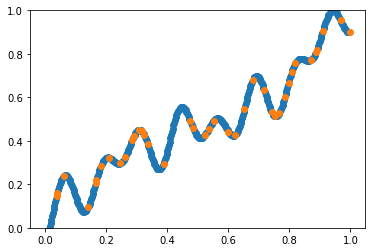

In [3]:
# Take 10% of data randomly as the test dataset
ntest = int(0.1*len(X))
idx = np.random.choice(X.shape[0], ntest, replace=False)

X_train = np.delete(X, idx)
Y_train = np.delete(Y, idx)

X_ = []
Y_ = []
for i in idx:
    X_.append(X[i])
    Y_.append(Y[i])

X_test = np.array(X_)
Y_test = np.array(Y_)

plt.ylim(0, 1)
plt.scatter(X_train,Y_train)
plt.scatter(X_test,Y_test, marker='o')

In [4]:
print(type(X_train), X_train.shape)
print(type(Y_train), Y_train.shape)
print(X_train.reshape(X_train.shape[0],-1).shape)

<class 'numpy.ndarray'> (360,)
<class 'numpy.ndarray'> (360,)
(360, 1)


## 2. Model define  

Linear model is defined as $H(x) = Wx + b$ by calling `nn.Linear` module in PyTorch.

### **Linear Model**   
$$H = \ XW + b \ \ ( W \in \mathcal{R}^{1 \times 1}, b \in \mathcal{R}^{1}, H \in \mathcal{R}^{N \times 1})$$


In [5]:
class LinearModel(nn.Module):
    def __init__(self, in_dim, out_dim):
        super(LinearModel, self).__init__()
        self.in_dim = in_dim
        self.out_dim = out_dim
        self.linear = nn.Linear(in_features=in_dim, out_features=out_dim, bias=False) # inputsize =1 , outputsize=1

    def forward(self, x):
        return self.linear(x)

## 3. Simulation Define

`pytorch` has a function named `loss.backward()` to calculate parameter gradients and then `optimizer.step()` can update all parameters using those gradient.

For every a certain amount of iteration, Test Set is tested by comparing the predicted value with true value using Mean Absolute Error. 

$$MAE(Y_{true}, Y_{predict}) = \sum_{i} | \ y_{true}^{(i)} - y_{predict}^{(i)} \ | $$

In [10]:
def experiment(args):

    # ===== call the model ===== #

    model = LinearModel(args.in_dim, args.out_dim)

    # ====== Loss function ====== #
    criterion = nn.MSELoss()
#    optimizer = optim.SGD(model.parameters(), lr=args.lr, momentum=args.momentum)
    optimizer = optim.Adam(model.parameters(), lr=args.lr)
    
    # ====== Data collection ====== #
    list_epoch=[]
    list_train_loss=[]
    list_val_loss=[]
    list_acc = []
    list_acc_epoch = []

    # ====== Loop ====== #
    for epoch in range(args.epoch):  
        
        # ====== Train ====== #
        model.train()
        optimizer.zero_grad() # Initialize optimizer with zero gradient

        input_x = torch.Tensor(X_train.reshape(X_train.shape[0],-1))
        true_y = torch.Tensor(Y_train)

        pred_y = model(input_x)

        loss = criterion(pred_y.squeeze(), true_y)
        loss.backward()
        optimizer.step()

        list_epoch.append(epoch)
        list_train_loss.append(loss.item())
 
       
        # ====== Evaluation ======= #
        if epoch % 100 == 0: 
            
            # ====== Calculate Accuracy ====== #
            model.eval()
            optimizer.zero_grad() # Initialize optimizer with zero gradient

            input_x = torch.Tensor(X_test.reshape(X_test.shape[0],-1))

            pred_y = model(input_x).detach().numpy() # change it to Numpy array after dropping gradient

            acc = mean_absolute_error(Y_test, pred_y)
            list_acc.append(acc)
            list_acc_epoch.append(epoch)

            plt.plot(X_train, Y_train, 'bo', label='Train data', alpha=0.5)
            plt.plot(X_test, Y_test, 'r^', label='True data', alpha=0.5)
            plt.plot(X_test, pred_y, 'g--', label='Predictions', alpha=0.5)
            plt.legend(loc='best')
            plt.show()
 
            print(f'\n Epoch: {epoch}, loss: {loss.item():.4f}')

    return list_epoch, list_train_loss, list_val_loss, list_acc, list_acc_epoch

## 4. Train & Evaluation

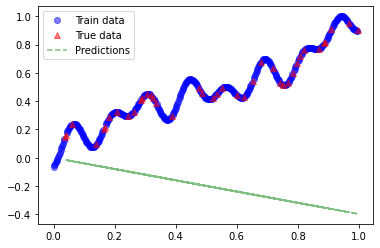


 Epoch: 0, loss: 0.5950


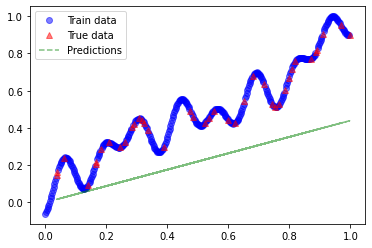


 Epoch: 100, loss: 0.0880


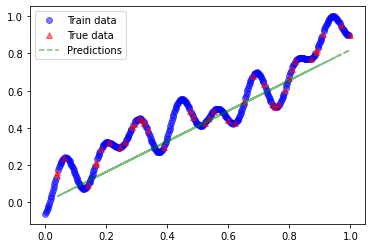


 Epoch: 200, loss: 0.0122


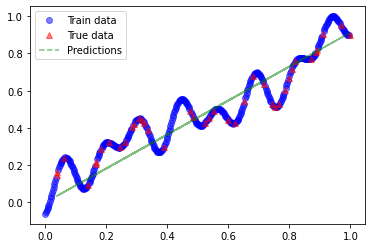


 Epoch: 300, loss: 0.0085


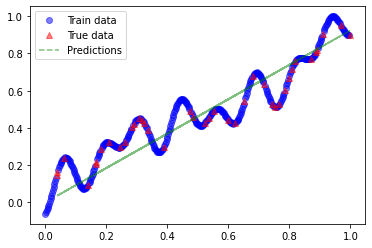


 Epoch: 400, loss: 0.0084


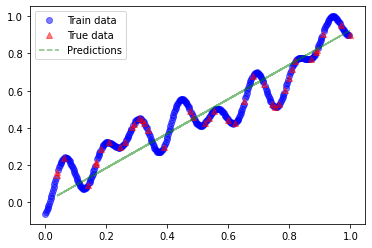


 Epoch: 500, loss: 0.0084


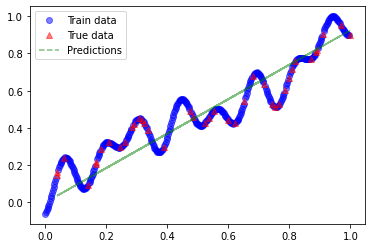


 Epoch: 600, loss: 0.0084


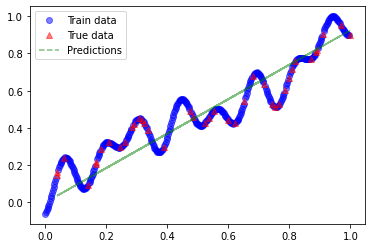


 Epoch: 700, loss: 0.0084


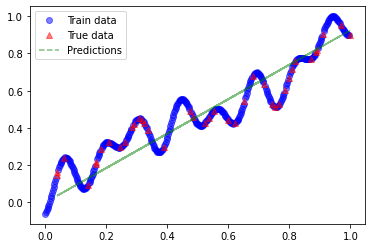


 Epoch: 800, loss: 0.0084


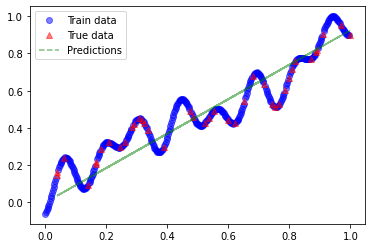


 Epoch: 900, loss: 0.0084

 Elapsed time: 2 sec


In [11]:
ts = time.time()

seed = 123
np.random.seed(seed)
torch.manual_seed(seed)

# Set hyperparameters
parser = argparse.ArgumentParser()

args = parser.parse_args("")

args.in_dim = 1
args.out_dim = 1
args.lr = 0.01
args.epoch =1000
args.momentum=0.9


list_epoch, list_train_loss, list_val_loss, list_acc, list_acc_epoch = experiment(args)


te = time.time()

print('\n Elapsed time: {} sec'.format(int(te-ts)))

## 5. Report  


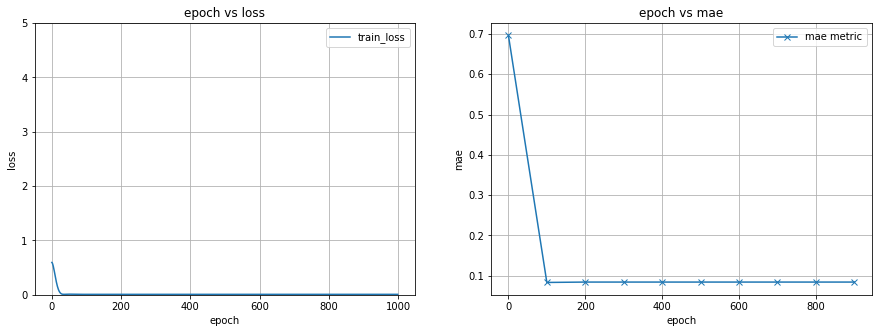

In [9]:
fig = plt.figure(figsize=(15,5))

# ====== Loss Fluctuation ====== #
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(list_epoch, list_train_loss, label='train_loss')
#ax1.plot(list_epoch, list_val_loss, '--', label='val_loss')
ax1.set_xlabel('epoch')
ax1.set_ylabel('loss')
ax1.set_ylim(0, 5)
ax1.grid()
ax1.legend()
ax1.set_title('epoch vs loss')

# ====== Metric Fluctuation ====== #
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(list_acc_epoch, list_acc, marker='x', label='mae metric')

ax2.set_xlabel('epoch')
ax2.set_ylabel('mae')
ax2.grid()
ax2.legend()
ax2.set_title('epoch vs mae')


plt.show()